In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("GALA-usd-max.csv")
df['snapped_at'] = pd.to_datetime(df['snapped_at'])
df['snapped_at'] = df['snapped_at'].dt.strftime('%Y-%m-%d')
df.head()

,snapped_at,price,market_cap,total_volume
0,2020-09-16,0.001550,0.0,15827.251535
1,2020-09-17,0.001550,0.0,15827.251535
2,2020-09-18,0.002191,0.0,56114.949176
3,2020-09-19,0.001567,0.0,65498.653941
4,2020-09-20,0.001545,0.0,26741.421334


In [3]:
df.tail()

,snapped_at,price,market_cap,total_volume
1375,2024-06-22,0.027903,1.004553e+09,1.008485e+08
1376,2024-06-23,0.028450,1.025643e+09,5.539994e+07
1377,2024-06-24,0.027113,9.762272e+08,6.322490e+07
1378,2024-06-25,0.028052,1.012078e+09,1.120518e+08
1379,2024-06-26,0.028557,1.031717e+09,7.630089e+07


In [4]:
df.describe()

,price,market_cap,total_volume
count,1380.000000,1.380000e+03,1.380000e+03
mean,0.067681,7.252115e+08,2.647261e+08
std,0.106313,8.522113e+08,4.226744e+08
min,0.000198,0.000000e+00,1.400018e+02
25%,0.019734,1.906391e+08,4.222097e+06
50%,0.030676,4.078072e+08,1.361266e+08
75%,0.055575,8.466103e+08,3.580960e+08
max,0.719239,5.417820e+09,6.304469e+09


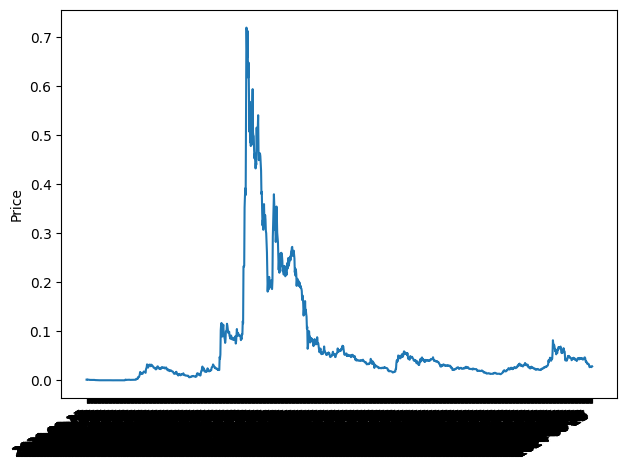

In [6]:
fig, ax = plt.subplots()

ax.plot(df["snapped_at"], df["price"])
# ax.set_xlabel("Date")
ax.set_ylabel("Price")
# ax.axvspan(2056, 2421, color='#808080', alpha=0.2)

# plt.xticks(np.arange(53, 2421,365))

fig.autofmt_xdate()
plt.tight_layout()

Is this Random Walk?


In [7]:
ADF_result = adfuller(df['price'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.508124486598664
p-value: 0.11351004321691904


p-value is not less than 0.05 so cannot reject null hypothesis.


so we get difference

In [8]:
diff_price = np.diff(df['price'], n=1)

In [9]:
diff_ADF_result = adfuller(diff_price)

print(f'ADF Statistic: {diff_ADF_result[0]}')
print(f'p-value: {diff_ADF_result[1]}')

ADF Statistic: -8.149099940606842
p-value: 9.805542339102412e-13


p-value is less than 0.05 so diff_price is stationary.

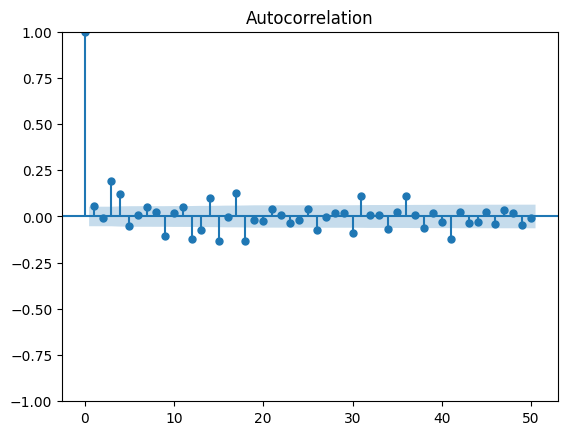

In [11]:
plot_acf(diff_price, lags=50);

Time series is very near to Random Walk. But not 100%.
Have some hopes than others.